<a href="https://colab.research.google.com/github/lakshya324/MLCOE-Task-2/blob/main/task2_1_Regession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLCOE Task 2.1 - Regression
$\textrm{Lakshya Sharma} $

## Step 1 - Data Preprocessing

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
State               0
Profit              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        38 non-null     float64
 1   Administration   32 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,38.000000,32.000000,50.000000,50.000000
mean,84471.755526,124460.951250,211025.097800,112012.639200
std,47140.937802,24360.580496,122290.310726,40306.180338
min,0.000000,51743.150000,0.000000,14681.400000
25%,65716.990000,113049.002500,129300.132500,90138.902500
50%,82404.585000,125604.625000,212716.240000,107978.190000
75%,120392.700000,145190.700000,299469.085000,139765.977500
max,165349.200000,157693.920000,471784.100000,192261.830000


In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.shape

(50, 5)

### One-Hot Encoding

In [8]:
df_encoded = pd.get_dummies(df, columns=['State'], prefix='',prefix_sep='',dtype=float)
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [9]:
df_encoded.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'California', 'Florida', 'New York'],
      dtype='object')

In [10]:
df_encoded['Profit'], df_encoded['New York'] = df_encoded['New York'].copy(), df_encoded['Profit'].copy()
df_refined=df_encoded.rename(columns={'Profit': 'New York', 'New York': 'Profit'})

In [11]:
df_refined.head()

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
0,165349.20,136897.80,471784.10,1.0,0.0,0.0,192261.83
1,162597.70,151377.59,443898.53,0.0,1.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,0.0,1.0,191050.39
3,144372.41,118671.85,383199.62,1.0,0.0,0.0,182901.99
4,142107.34,91391.77,366168.42,0.0,0.0,1.0,166187.94


In [12]:
df_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        38 non-null     float64
 1   Administration   32 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   New York         50 non-null     float64
 4   California       50 non-null     float64
 5   Florida          50 non-null     float64
 6   Profit           50 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [13]:
correlation_matrix = df_refined.corr()
correlation_matrix

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
R&D Spend,1.000000,0.162234,0.745607,0.064749,-0.165154,0.097069,0.976569
Administration,0.162234,1.000000,-0.024572,-0.150790,0.180690,-0.030638,0.131789
Marketing Spend,0.745607,-0.024572,1.000000,-0.033670,-0.168875,0.205685,0.747766
New York,0.064749,-0.150790,-0.033670,1.000000,-0.515152,-0.492366,0.031368
California,-0.165154,0.180690,-0.168875,-0.515152,1.000000,-0.492366,-0.145837
Florida,0.097069,-0.030638,0.205685,-0.492366,-0.492366,1.000000,0.116244
Profit,0.976569,0.131789,0.747766,0.031368,-0.145837,0.116244,1.000000


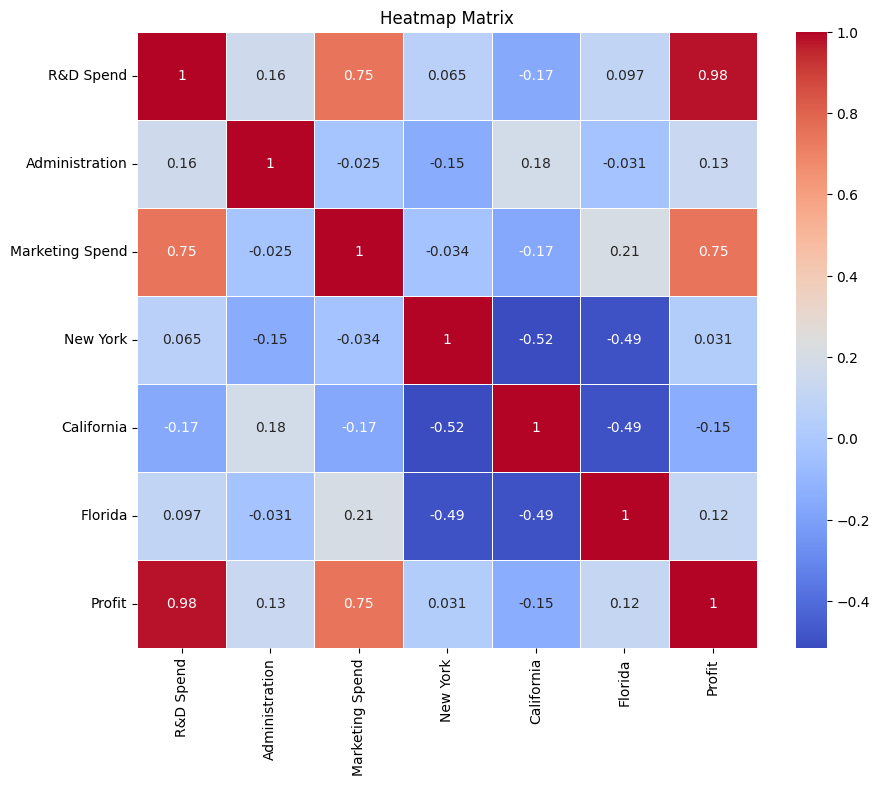

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Matrix')
plt.show()

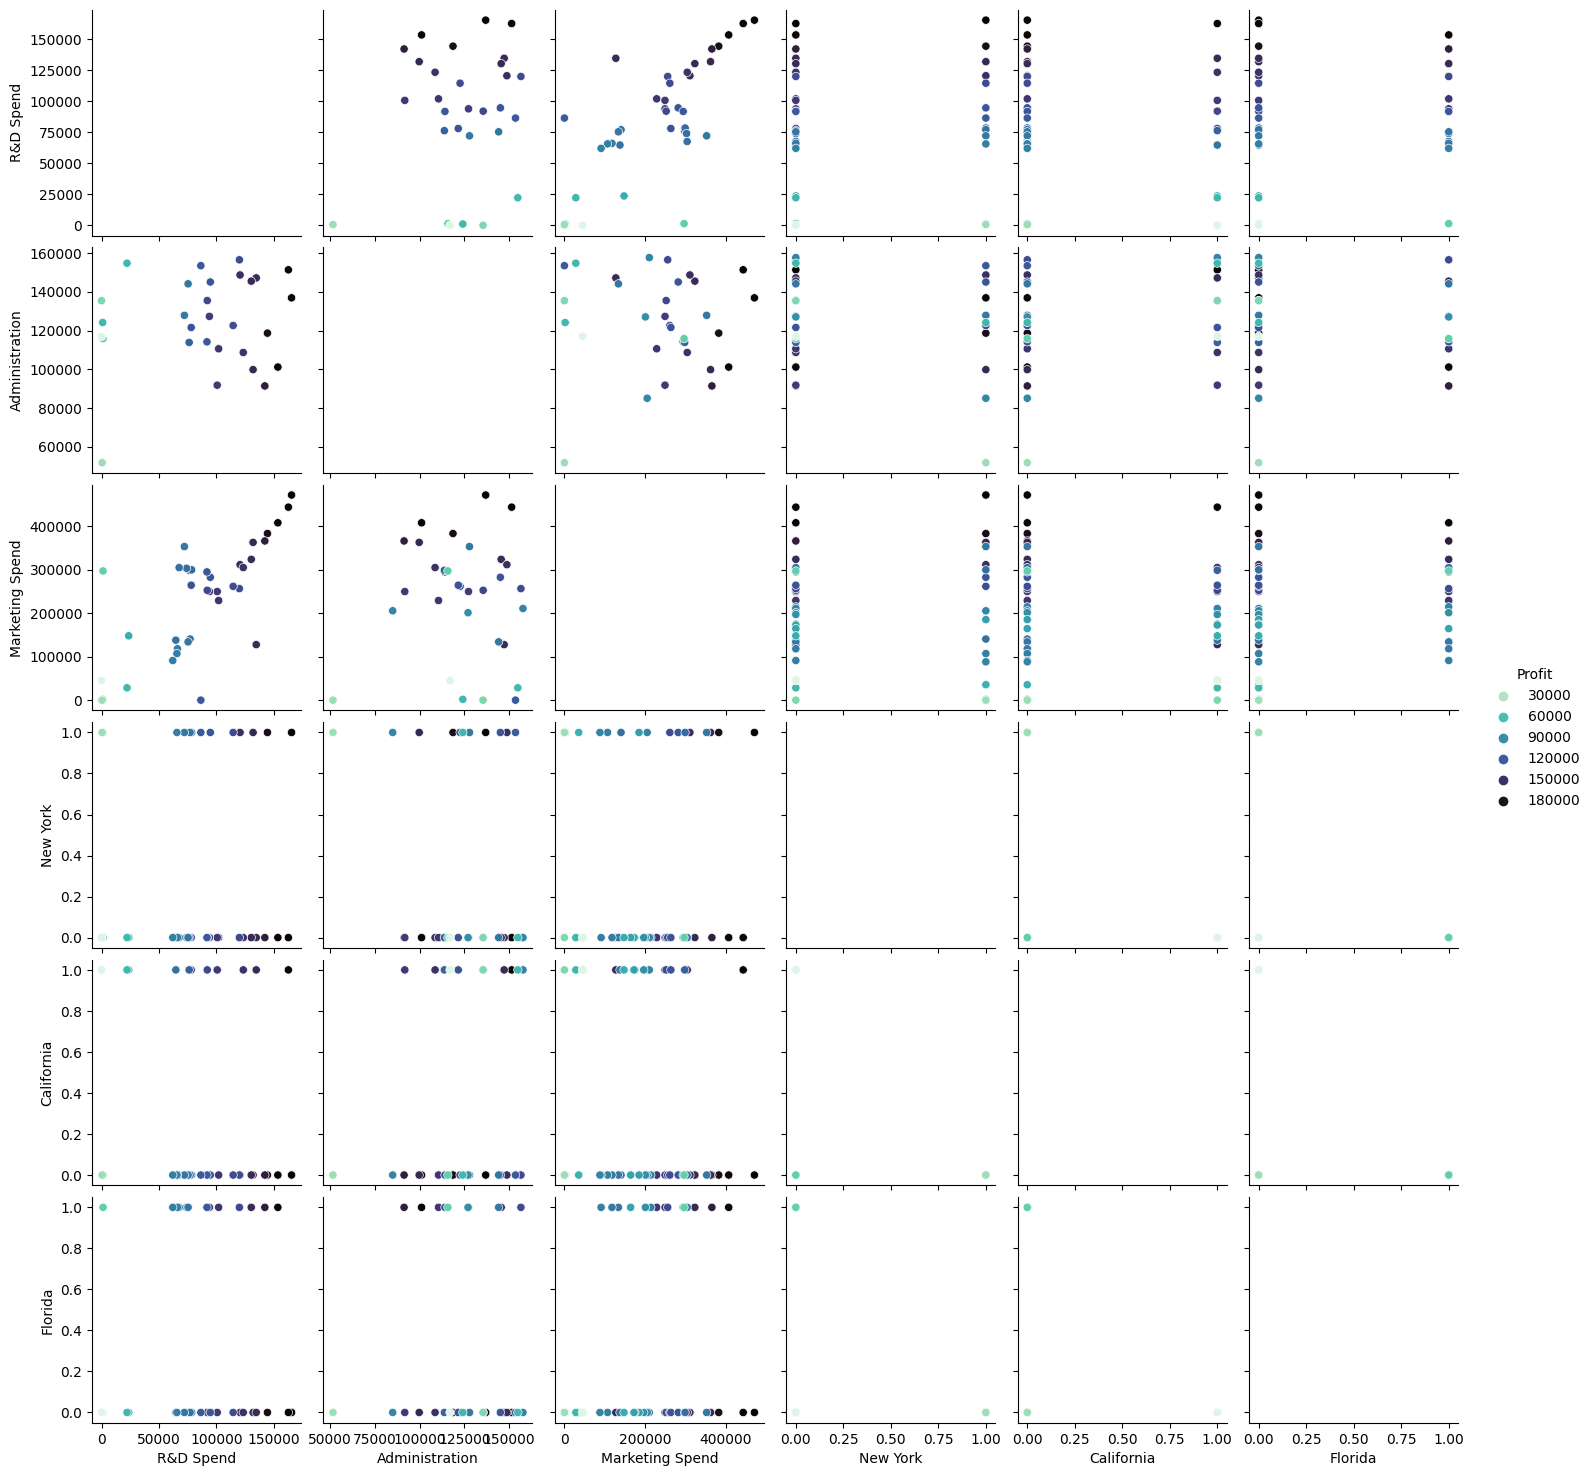

In [15]:
sns.pairplot(df_refined,hue='Profit',palette="mako_r")
plt.show()

### Missing Values

In [16]:
df_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        38 non-null     float64
 1   Administration   32 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   New York         50 non-null     float64
 4   California       50 non-null     float64
 5   Florida          50 non-null     float64
 6   Profit           50 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [17]:
df_refined.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
New York            0
California          0
Florida             0
Profit              0
dtype: int64

#### R&D Spend Column

In [18]:
df_refined['R&D Spend'] = df_refined.groupby('New York')['R&D Spend'].transform(lambda x: x.fillna(x.mean()))
df_refined['R&D Spend'] = df_refined.groupby('California')['R&D Spend'].transform(lambda x: x.fillna(x.mean()))
df_refined['R&D Spend'] = df_refined.groupby('Florida')['R&D Spend'].transform(lambda x: x.fillna(x.mean()))

In [19]:
df_refined.isnull().sum()

R&D Spend           0
Administration     18
Marketing Spend     0
New York            0
California          0
Florida             0
Profit              0
dtype: int64

#### Administration Column

In [20]:
df_refined['Administration'] = df_refined.groupby('New York')['Administration'].transform(lambda x: x.fillna(x.mean()))
df_refined['Administration'] = df_refined.groupby('California')['Administration'].transform(lambda x: x.fillna(x.mean()))
df_refined['Administration'] = df_refined.groupby('Florida')['Administration'].transform(lambda x: x.fillna(x.mean()))

In [21]:
df_refined.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
New York           0
California         0
Florida            0
Profit             0
dtype: int64

In [22]:
df_refined

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
0,165349.200000,136897.800000,471784.10,1.0,0.0,0.0,192261.83
1,162597.700000,151377.590000,443898.53,0.0,1.0,0.0,191792.06
2,153441.510000,101145.550000,407934.54,0.0,0.0,1.0,191050.39
3,144372.410000,118671.850000,383199.62,1.0,0.0,0.0,182901.99
4,142107.340000,91391.770000,366168.42,0.0,0.0,1.0,166187.94
5,131876.900000,99814.710000,362861.36,1.0,0.0,0.0,156991.12
6,134615.460000,147198.870000,127716.82,0.0,1.0,0.0,156122.51
7,130298.130000,145530.060000,323876.68,0.0,0.0,1.0,155752.60
8,120542.520000,148718.950000,311613.29,1.0,0.0,0.0,152211.77
9,123334.880000,108679.170000,304981.62,0.0,1.0,0.0,149759.96


In [23]:
correlation_matrix = df_refined.corr()
correlation_matrix

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
R&D Spend,1.000000,0.128677,0.695159,0.074113,-0.152250,0.079348,0.910322
Administration,0.128677,1.000000,-0.014053,-0.186817,0.177308,0.009657,0.118531
Marketing Spend,0.695159,-0.014053,1.000000,-0.033670,-0.168875,0.205685,0.747766
New York,0.074113,-0.186817,-0.033670,1.000000,-0.515152,-0.492366,0.031368
California,-0.152250,0.177308,-0.168875,-0.515152,1.000000,-0.492366,-0.145837
Florida,0.079348,0.009657,0.205685,-0.492366,-0.492366,1.000000,0.116244
Profit,0.910322,0.118531,0.747766,0.031368,-0.145837,0.116244,1.000000


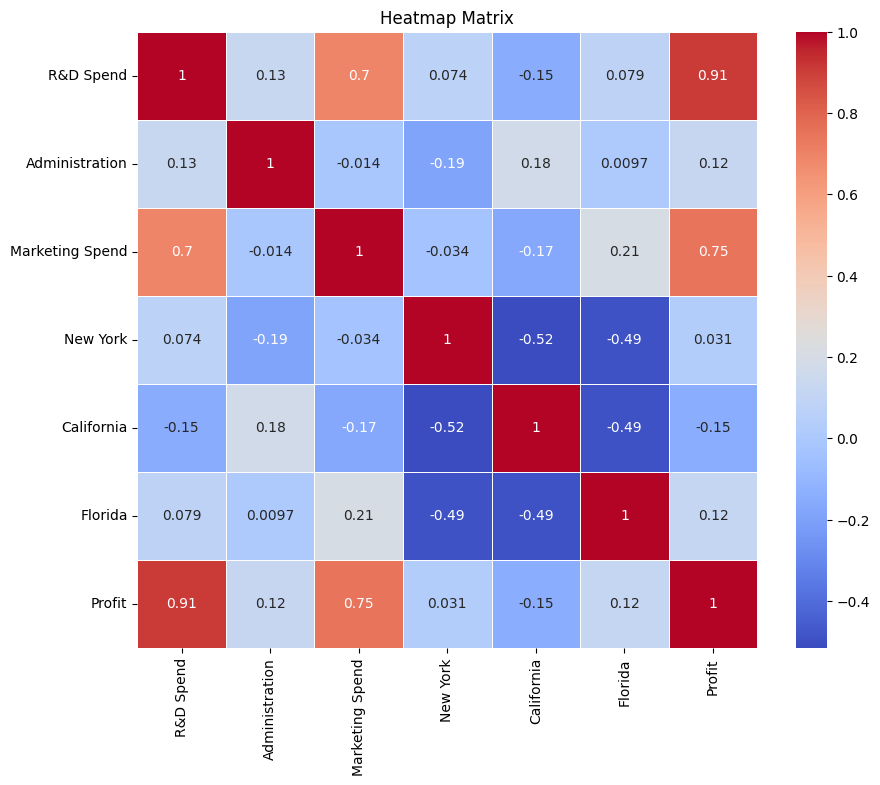

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Matrix')
plt.show()

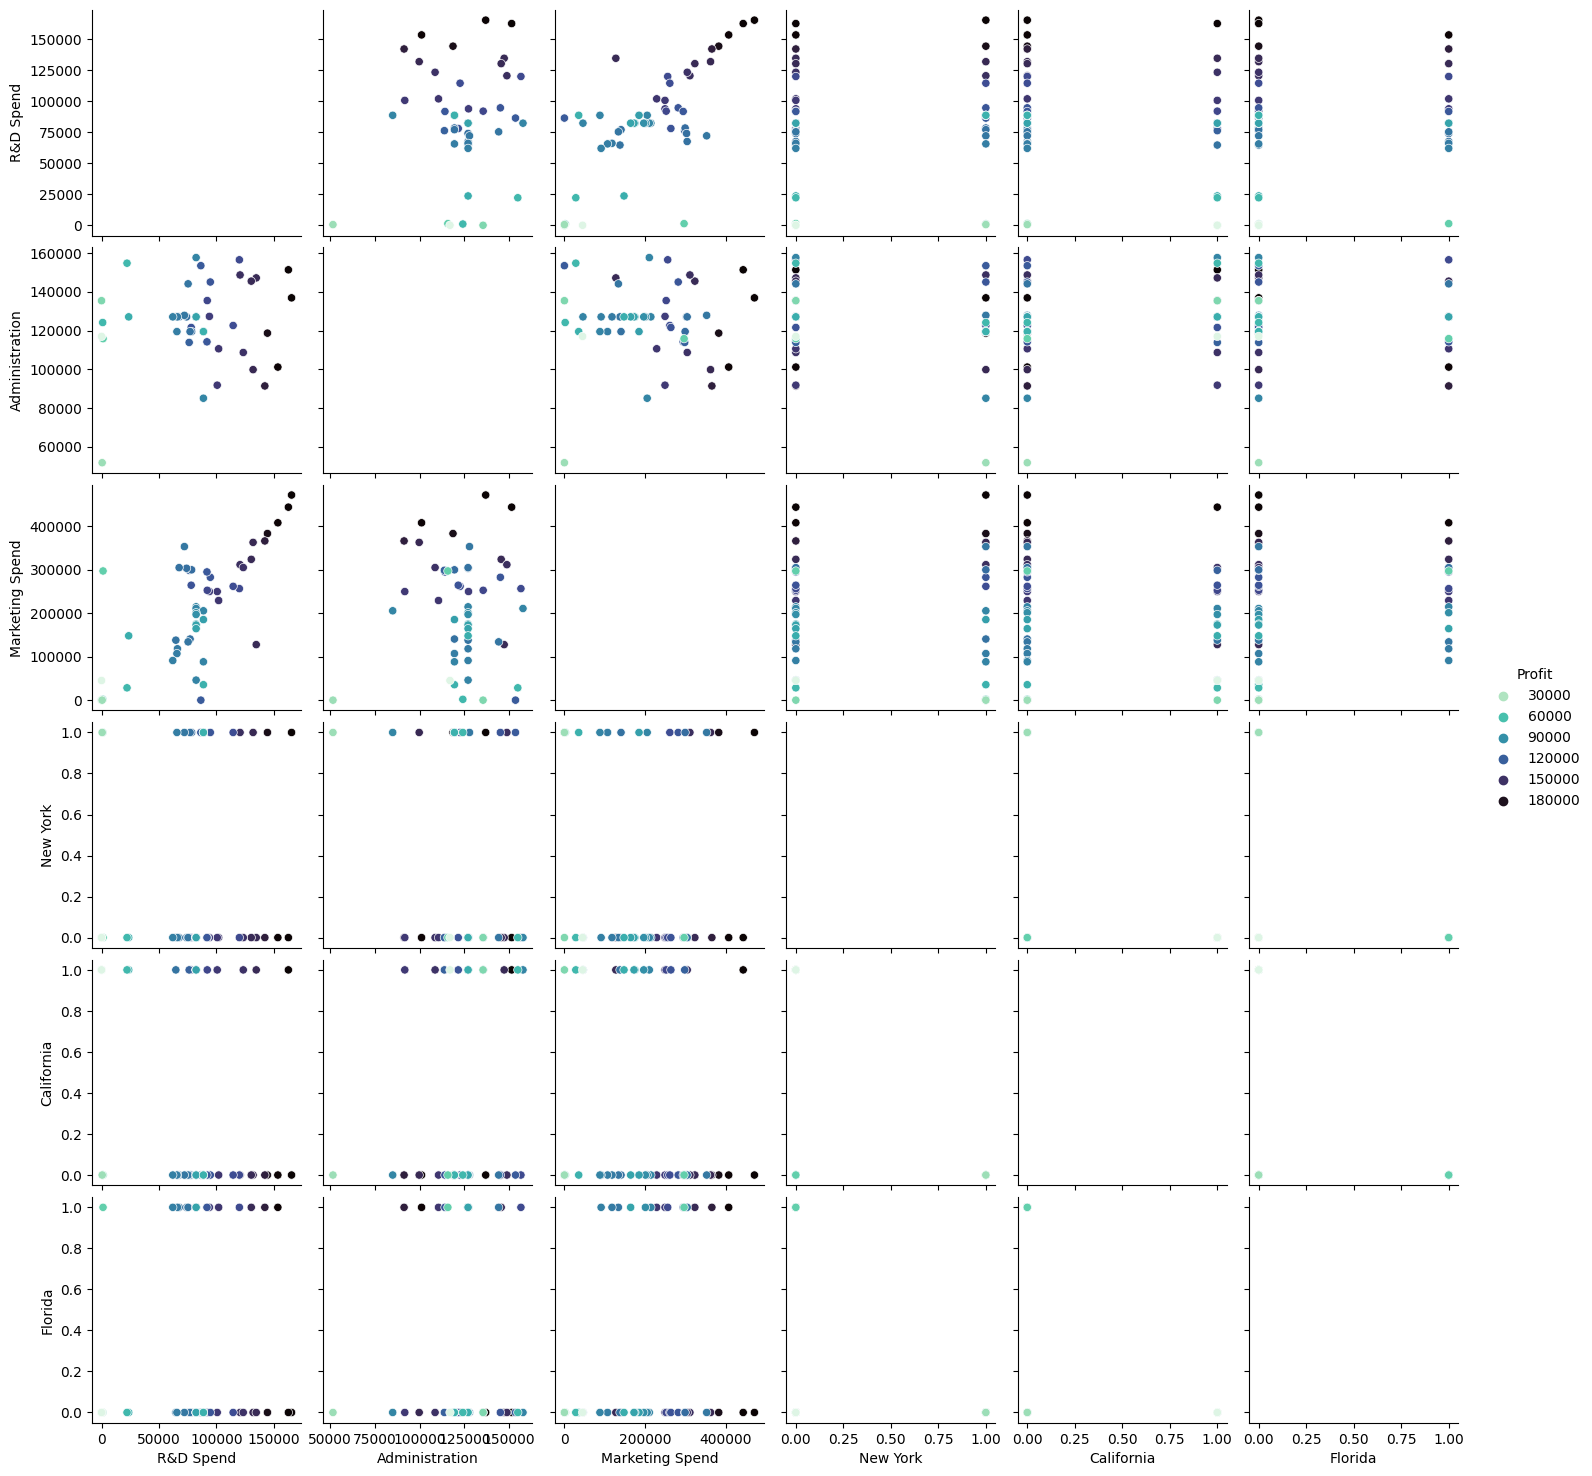

In [25]:
sns.pairplot(df_refined,hue='Profit',palette="mako_r")
plt.show()

### Data Spliting

In [26]:
x=df_refined.iloc[:,:-1].values
y=df_refined.iloc[:,-1].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Feature Extraction

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()
x_train[:,:-3]=sc.fit_transform(x_train[:,:-3])
x_test[:,:-3]=sc.transform(x_test[:,:-3])

In [31]:
x_test

array([[-0.35840914,  0.0020156 , -0.68032287,  0.        ,  0.        ,
         1.        ],
       [ 0.45395119, -1.79731615,  0.38557774,  0.        ,  1.        ,
         0.        ],
       [ 0.48307378, -0.8385011 ,  0.21885524,  0.        ,  0.        ,
         1.        ],
       [ 0.02285414,  0.0020156 , -0.30512104,  0.        ,  0.        ,
         1.        ],
       [ 1.69217605, -1.32029553,  1.6668808 ,  0.        ,  0.        ,
         1.        ],
       [-0.21630467,  0.04214122,  1.22341229,  1.        ,  0.        ,
         0.        ],
       [ 0.1718233 , -0.38613955, -0.13669119,  1.        ,  0.        ,
         0.        ],
       [ 0.1718233 , -0.38613955, -0.92274884,  1.        ,  0.        ,
         0.        ],
       [-0.17202761,  0.0020156 ,  0.81952074,  0.        ,  0.        ,
         1.        ],
       [ 1.42622246, -1.81765353,  1.32858469,  0.        ,  0.        ,
         1.        ]])

## Step 2 - Models

In [32]:
from sklearn.metrics import r2_score
models_score={}

### Model 1 - Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=regressor.predict(x_test)
np.concatenate([y_test.reshape(-1,1),y_pred.reshape(-1,1)],axis=1)

array([[103282.38      ,  90481.42503162],
       [144259.4       , 116287.7446838 ],
       [146121.95      , 119893.62761555],
       [ 77798.83      , 105091.25646391],
       [191050.39      , 166715.43369125],
       [105008.31      , 119534.84073174],
       [ 81229.06      , 115676.76513767],
       [ 97483.56      , 108035.15276281],
       [110352.25      , 110421.02761549],
       [166187.94      , 153694.60577251]])

In [36]:
score=r2_score(y_test,y_pred)
score

0.637470585059708

In [37]:
models_score['Linear Regression']=score

### Model 2 - Polynomial Linear Regression [Degree 2-10]

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_linear_score=[]
for i in range(2,11):
  poly=PolynomialFeatures(degree=i)
  regressor.fit(poly.fit_transform(x_train),y_train)
  y_pred=regressor.predict(poly.fit_transform(x_test))
  score=r2_score(y_test, y_pred)
  poly_linear_score.append(score)
  print(f'[INFO] Degree {i:2d}th Polynomial Linear Regression score {score:6f}')

[INFO] Degree  2th Polynomial Linear Regression score 0.721462
[INFO] Degree  3th Polynomial Linear Regression score -419257084.667861
[INFO] Degree  4th Polynomial Linear Regression score -762.338281
[INFO] Degree  5th Polynomial Linear Regression score -398.295869
[INFO] Degree  6th Polynomial Linear Regression score -689.414770
[INFO] Degree  7th Polynomial Linear Regression score -587.742605
[INFO] Degree  8th Polynomial Linear Regression score -1445.596548
[INFO] Degree  9th Polynomial Linear Regression score -1307.588171
[INFO] Degree 10th Polynomial Linear Regression score -2353.977053


In [40]:
max_value,max_index= max((value, index) for index, value in enumerate(poly_linear_score))
models_score[f'Poly Linear Regression({max_index+2} degree)']=max_value

### Model 3 - Support Vector Regression (SVR)

In [41]:
from sklearn.svm import SVR

In [42]:
regressor=SVR(kernel='rbf')
regressor.fit(x_train,y_train)

SVR()

In [43]:
y_pred=regressor.predict(x_test)
np.concatenate([y_test.reshape(-1,1),y_pred.reshape(-1,1)],axis=1)

array([[103282.38      , 107977.49458005],
       [144259.4       , 107982.44066574],
       [146121.95      , 107982.79755601],
       [ 77798.83      , 107979.67475427],
       [191050.39      , 107984.2947829 ],
       [105008.31      , 107985.25672173],
       [ 81229.06      , 107981.89431845],
       [ 97483.56      , 107979.10339642],
       [110352.25      , 107983.41104887],
       [166187.94      , 107983.69143458]])

In [44]:
score=r2_score(y_test,y_pred)
score

-0.15972262313159868

In [45]:
models_score['Support Vector Regression']=score

### Model 4 - Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [48]:
y_pred=regressor.predict(x_test)
np.concatenate([y_test.reshape(-1,1),y_pred.reshape(-1,1)],axis=1)

array([[103282.38,  99937.59],
       [144259.4 , 141585.52],
       [146121.95, 141585.52],
       [ 77798.83,  78239.91],
       [191050.39, 182901.99],
       [105008.31, 111313.02],
       [ 81229.06,  81005.76],
       [ 97483.56,  97427.84],
       [110352.25, 108733.99],
       [166187.94, 182901.99]])

In [49]:
score=r2_score(y_test,y_pred)
score

0.9665891935930984

In [50]:
models_score['Decision Tree Regression']=score

### Model 5 - Random Forest Regression (Ensemble)

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
regressor=RandomForestRegressor(random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [53]:
y_pred=regressor.predict(x_test)
np.concatenate([y_test.reshape(-1,1),y_pred.reshape(-1,1)],axis=1)

array([[103282.38  , 102769.7795],
       [144259.4   , 136106.252 ],
       [146121.95  , 130573.3726],
       [ 77798.83  ,  83389.3991],
       [191050.39  , 183896.3456],
       [105008.31  , 114042.0702],
       [ 81229.06  ,  86452.5389],
       [ 97483.56  ,  92451.1939],
       [110352.25  , 111398.5038],
       [166187.94  , 167637.7069]])

In [54]:
score=r2_score(y_test,y_pred)
score

0.9586873201302915

In [55]:
models_score['Random Forest Regression']=score

### Model 6 - Artificial Neural Network (ANN)

In [56]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [57]:
score_ann={}
for i in range(1,7):
  for j in range(1,i+1):
    print(f'[INFO] Hidden Layers: {i}th nodes -> {j}th nodes.')
    ann=tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=i,activation='relu'))
    ann.add(tf.keras.layers.Dense(units=j,activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1))
    ann.compile(optimizer='adam',loss='mean_squared_error')
    ann.fit(x_train,y_train,epochs=10)
    y_pred=ann.predict(x_test)
    score=r2_score(y_test,y_pred)
    score_ann[f'{i} {j}']=score
    print(f'Score: {score}')
    print('\n\n')

[INFO] Hidden Layers: 1th nodes -> 1th nodes.
Epoch 1/10
2/2 [==============================] - 1s 12ms/step - loss: 13615966208.0000
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 13615965184.0000
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 13615962112.0000
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 13615961088.0000
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 13615960064.0000
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 13615958016.0000
Epoch 7/10
2/2 [==============================] - 0s 10ms/step - loss: 13615955968.0000
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 13615954944.0000
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 13615952896.0000
Epoch 10/10
1/1 [==============================] - 0s 137ms/step
Score: -11.691124585966813



[INFO] Hidden Layers: 2th nodes -> 1th nodes.
Epoch 1/10
2/2 [============

1/1 [==============================] - 0s 65ms/step
Score: -11.69118715930035



[INFO] Hidden Layers: 3th nodes -> 3th nodes.
Epoch 1/10
2/2 [==============================] - 1s 11ms/step - loss: 13616082944.0000
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 13616080896.0000
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 13616077824.0000
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 13616075776.0000
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 13616073728.0000
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 13616070656.0000
Epoch 7/10
2/2 [==============================] - 0s 12ms/step - loss: 13616068608.0000
Epoch 8/10
2/2 [==============================] - 0s 9ms/step - loss: 13616065536.0000
Epoch 9/10
2/2 [==============================] - 0s 10ms/step - loss: 13616063488.0000
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 13616061440.000

1/1 [==============================] - 0s 67ms/step
Score: -11.691194922455487



[INFO] Hidden Layers: 4th nodes -> 1th nodes.
Epoch 1/10
2/2 [==============================] - 1s 17ms/step - loss: 13615922176.0000
Epoch 2/10
2/2 [==============================] - 0s 10ms/step - loss: 13615921152.0000
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 13615918080.0000
Epoch 4/10
2/2 [==============================] - 0s 10ms/step - loss: 13615917056.0000
Epoch 5/10
2/2 [==============================] - 0s 9ms/step - loss: 13615913984.0000
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 13615912960.0000
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 13615909888.0000
Epoch 8/10
2/2 [==============================] - 0s 9ms/step - loss: 13615907840.0000
Epoch 9/10
2/2 [==============================] - 0s 14ms/step - loss: 13615904768.0000
Epoch 10/10
1/1 [==============================] - 0s 71ms/step
Score: -11.6910904587

In [58]:
score_ann

{'1 1': -11.691124585966813,
 '2 1': -11.691185910277037,
 '2 2': -11.691185174130508,
 '3 1': -11.69120186932006,
 '3 2': -11.69118715930035,
 '3 3': -11.691194922455487,
 '4 1': -11.691090458765315,
 '4 2': -11.691099626687858,
 '4 3': -11.69129724629999,
 '4 4': -11.69115620208572,
 '5 1': -11.691159323430858,
 '5 2': -11.691204411532732,
 '5 3': -11.691007063581903,
 '5 4': -11.691171097655383,
 '5 5': -11.691158989806793,
 '6 1': -11.691185916536588,
 '6 2': -11.69118008038903,
 '6 3': -11.691185155628704,
 '6 4': -11.691124464932125,
 '6 5': -11.691197111955551,
 '6 6': -11.69117216180868}

In [59]:
max_key=max(score_ann,key=lambda x:score_ann[x])
models_score[f"ANN(Hidden nodes:{max_key})"]=score_ann[max_key]

## Step 3 - Analysing Best Model

In [60]:
models_score

{'Linear Regression': 0.637470585059708,
 'Poly Linear Regression(2 degree)': 0.7214616705229813,
 'Support Vector Regression': -0.15972262313159868,
 'Decision Tree Regression': 0.9665891935930984,
 'Random Forest Regression': 0.9586873201302915,
 'ANN(Hidden nodes:5 3)': -11.691007063581903}

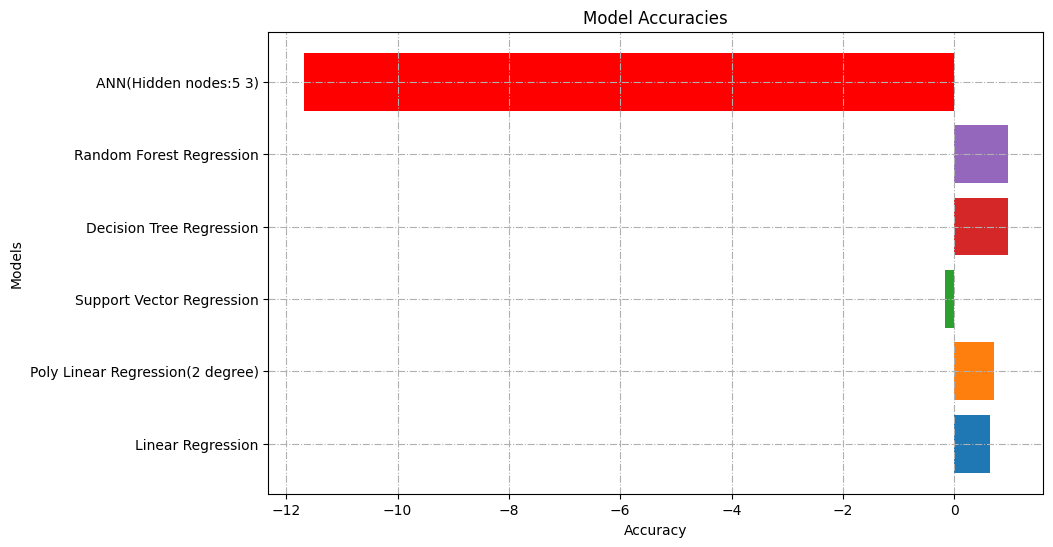

In [61]:
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','r']
plt.barh(list(models_score.keys()),list(models_score.values()),color=colors)
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.grid(True, linestyle='-.')
plt.show()

In [62]:
#removing ANN for better Analysis
for i in models_score.keys():
  if 'ANN' in i:
    del models_score[i]
    break
models_score

{'Linear Regression': 0.637470585059708,
 'Poly Linear Regression(2 degree)': 0.7214616705229813,
 'Support Vector Regression': -0.15972262313159868,
 'Decision Tree Regression': 0.9665891935930984,
 'Random Forest Regression': 0.9586873201302915}

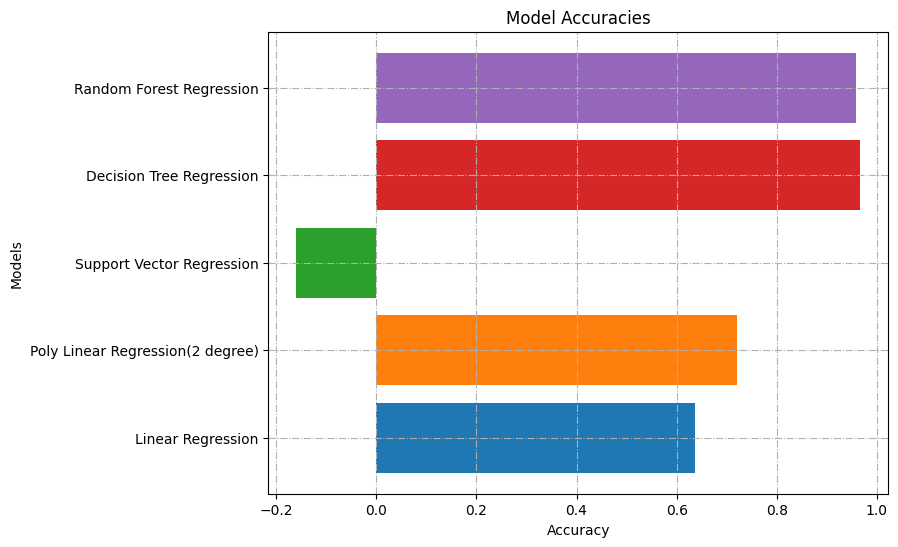

In [63]:
plt.figure(figsize=(8,6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.barh(list(models_score.keys()),list(models_score.values()),color=colors)
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.grid(True, linestyle='-.')
plt.show()

Best Model Fit for Dataset:
1. Decision Tree
2. Random Forest
3. Polynomial Linear Regression [Best: 2nd Degree]
4. Linear Regression
5. Support Vector Regression (-ve r2 score)
6. ANN [Best: 6 and 6 nodes in hidden Layer] (-ve r2 score)

## Step 4 - Analysing Linear Regression

In [64]:
df_refined.head()

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
0,165349.20,136897.80,471784.10,1.0,0.0,0.0,192261.83
1,162597.70,151377.59,443898.53,0.0,1.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,0.0,1.0,191050.39
3,144372.41,118671.85,383199.62,1.0,0.0,0.0,182901.99
4,142107.34,91391.77,366168.42,0.0,0.0,1.0,166187.94


### Prinicipal Component Analysis (PCA) Dimensionality Reduction

#### 2D Plot

In [65]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
x_train_new=pca.fit_transform(x_train)
x_test_new=pca.transform(x_test)

In [66]:
x_test_new

array([[ 0.63990668],
       [ 0.06207991],
       [-0.24623875],
       [ 0.13526029],
       [-1.85674019],
       [-0.66743284],
       [ 0.08494488],
       [ 0.59333201],
       [-0.4581963 ],
       [-1.29328681]])

In [67]:
regressor=LinearRegression()
regressor.fit(x_train_new,y_train)
y_pred=regressor.predict(x_test_new)
score=r2_score(y_test,y_pred)
score

0.5409571281475289

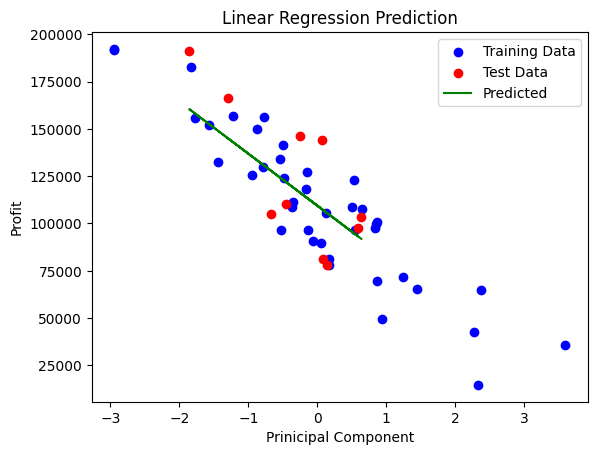

In [68]:
plt.scatter(x_train_new,y_train,color='b',label='Training Data')
plt.scatter(x_test_new,y_test,color='r',label='Test Data')
plt.plot(x_test_new,y_pred,color='g',label='Predicted')
plt.title('Linear Regression Prediction')
plt.xlabel('Prinicipal Component')
plt.ylabel('Profit')
plt.legend()
plt.show()

#### 3D Plot

In [69]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train_new3=pca.fit_transform(x_train)
x_test_new3=pca.transform(x_test)
x_test_new3

array([[ 0.63990668, -0.2864744 ],
       [ 0.06207991,  1.59014215],
       [-0.24623875,  0.84326207],
       [ 0.13526029, -0.12470314],
       [-1.85674019,  1.87122077],
       [-0.66743284,  0.57409227],
       [ 0.08494488,  0.54344218],
       [ 0.59333201,  0.28305994],
       [-0.4581963 ,  0.22867484],
       [-1.29328681,  2.176305  ]])

In [70]:
regressor=LinearRegression()
regressor.fit(x_train_new3,y_train)
y_pred=regressor.predict(x_test_new3)
score=r2_score(y_test,y_pred)
score

0.620707203695268

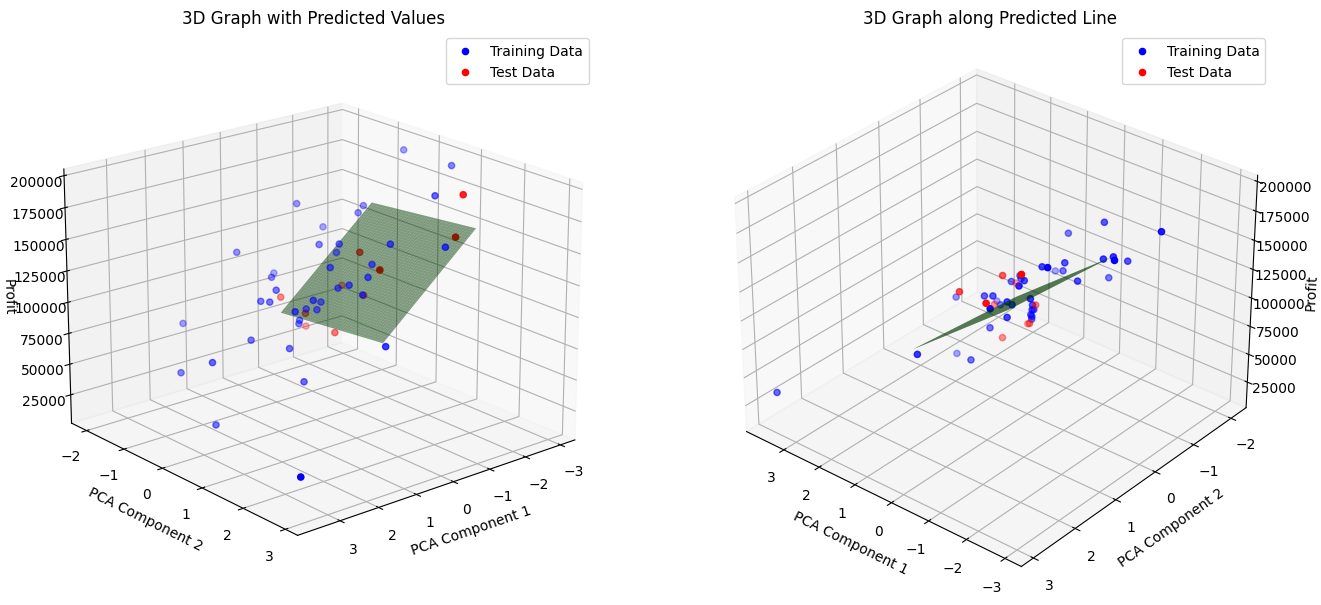

In [71]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_train_new3[:, 0], x_train_new3[:, 1], y_train, c='blue', label='Training Data')
ax1.scatter(x_test_new3[:, 0], x_test_new3[:, 1], y_test, c='red', label='Test Data')
x_plane = np.linspace(min(x_test_new3[:, 0]), max(x_test_new3[:, 0]), 100)
y_plane = np.linspace(min(x_test_new3[:, 1]), max(x_test_new3[:, 1]), 100)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = regressor.predict(np.c_[x_plane.reshape(-1), y_plane.reshape(-1)])
z_plane = z_plane.reshape(x_plane.shape)
ax1.plot_surface(x_plane, y_plane, z_plane,alpha=0.5,color='green')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('Profit')
ax1.set_title('3D Graph with Predicted Values')
ax1.view_init(elev=20, azim=50)
ax1.legend()


ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x_train_new3[:, 0], x_train_new3[:, 1], y_train, c='blue', label='Training Data')
ax2.scatter(x_test_new3[:, 0], x_test_new3[:, 1], y_test, c='red', label='Test Data')
x_plane = np.linspace(min(x_test_new3[:, 0]), max(x_test_new3[:, 0]), 100)
y_plane = np.linspace(min(x_test_new3[:, 1]), max(x_test_new3[:, 1]), 100)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = regressor.predict(np.c_[x_plane.reshape(-1), y_plane.reshape(-1)])
z_plane = z_plane.reshape(x_plane.shape)
ax2.plot_surface(x_plane, y_plane, z_plane, color='green')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('Profit')
ax2.set_title('3D Graph along Predicted Line')
ax2.legend()
ax2.view_init(elev=31, azim=130)
plt.show()

## Step 5 - Analysing Decision Tree Regression (2nd Best Model Suited)

In [72]:
df_refined.head()

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
0,165349.20,136897.80,471784.10,1.0,0.0,0.0,192261.83
1,162597.70,151377.59,443898.53,0.0,1.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,0.0,1.0,191050.39
3,144372.41,118671.85,383199.62,1.0,0.0,0.0,182901.99
4,142107.34,91391.77,366168.42,0.0,0.0,1.0,166187.94


### Prinicipal Component Analysis (PCA) Dimensionality Reduction

#### 2D Plot

In [73]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train_new,y_train)
y_pred=regressor.predict(x_test_new)
y_pred_d=regressor.predict(np.linspace(min(x_test_new),max(x_test_new),100))
score=r2_score(y_test,y_pred)
score

0.4099847713092818

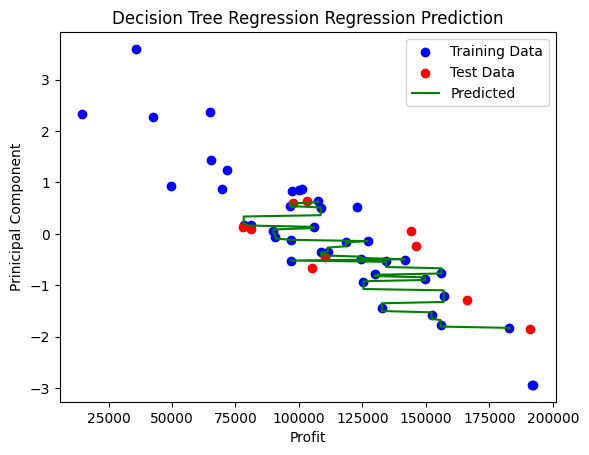

In [74]:
plt.scatter(y_train,x_train_new,color='b',label='Training Data')
plt.scatter(y_test,x_test_new,color='r',label='Test Data')
plt.plot(y_pred_d,np.linspace(min(x_test_new),max(x_test_new),100),color='g',label='Predicted')
plt.title('Decision Tree Regression Regression Prediction')
plt.ylabel('Prinicipal Component')
plt.xlabel('Profit')
plt.legend()
plt.show()

#### 3D Plot

In [75]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train_new3=pca.fit_transform(x_train)
x_test_new3=pca.transform(x_test)
x_test_new3

array([[ 0.63990668, -0.2864744 ],
       [ 0.06207991,  1.59014215],
       [-0.24623875,  0.84326207],
       [ 0.13526029, -0.12470314],
       [-1.85674019,  1.87122077],
       [-0.66743284,  0.57409227],
       [ 0.08494488,  0.54344218],
       [ 0.59333201,  0.28305994],
       [-0.4581963 ,  0.22867484],
       [-1.29328681,  2.176305  ]])

In [76]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train_new3,y_train)
y_pred=regressor.predict(x_test_new3)
score=r2_score(y_test,y_pred)
score

0.6446508925602148

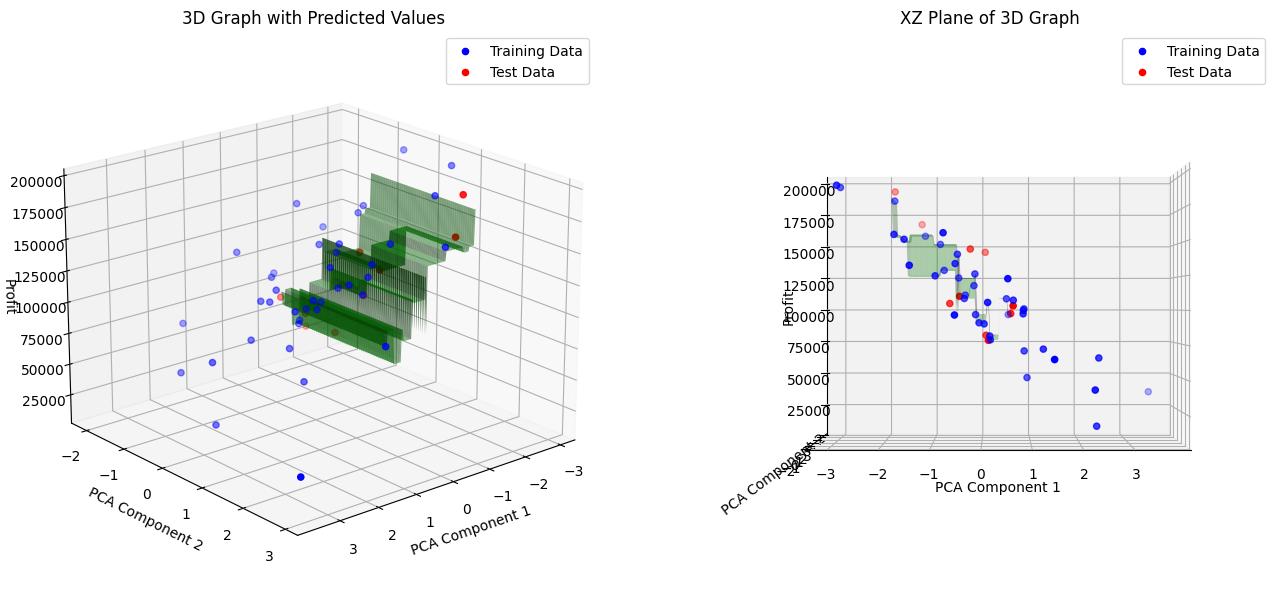

In [77]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_train_new3[:, 0], x_train_new3[:, 1], y_train, c='blue', label='Training Data')
ax1.scatter(x_test_new3[:, 0], x_test_new3[:, 1], y_test, c='red', label='Test Data')
x_plane = np.linspace(min(x_test_new3[:, 0]), max(x_test_new3[:, 0]), 100)
y_plane = np.linspace(min(x_test_new3[:, 1]), max(x_test_new3[:, 1]), 100)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = regressor.predict(np.c_[x_plane.reshape(-1), y_plane.reshape(-1)])
z_plane = z_plane.reshape(x_plane.shape)
ax1.plot_surface(x_plane, y_plane, z_plane,alpha=0.5,color='green')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('Profit')
ax1.set_title('3D Graph with Predicted Values')
ax1.view_init(elev=20, azim=50)
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x_train_new3[:, 0], x_train_new3[:, 1], y_train, c='blue', label='Training Data')
ax2.scatter(x_test_new3[:, 0], x_test_new3[:, 1], y_test, c='red', label='Test Data')
x_plane = np.linspace(min(x_test_new3[:, 0]), max(x_test_new3[:, 0]), 100)
y_plane = np.linspace(min(x_test_new3[:, 1]), max(x_test_new3[:, 1]), 100)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = regressor.predict(np.c_[x_plane.reshape(-1), y_plane.reshape(-1)])
z_plane = z_plane.reshape(x_plane.shape)
ax2.plot_surface(x_plane, y_plane, z_plane,alpha=0.3,color='green')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('Profit')
ax2.set_title('XZ Plane of 3D Graph')
ax2.legend()
ax2.view_init(elev=0, azim=-90)

plt.show()

## Step 6 - Analysing Random Forest Regression (2nd Best Model Suited)

In [78]:
df_refined.head()

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
0,165349.20,136897.80,471784.10,1.0,0.0,0.0,192261.83
1,162597.70,151377.59,443898.53,0.0,1.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,0.0,1.0,191050.39
3,144372.41,118671.85,383199.62,1.0,0.0,0.0,182901.99
4,142107.34,91391.77,366168.42,0.0,0.0,1.0,166187.94


### Prinicipal Component Analysis (PCA) Dimensionality Reduction

#### 2D Plot

In [79]:
regressor=RandomForestRegressor(random_state=0)
regressor.fit(x_train_new,y_train)
y_pred=regressor.predict(x_test_new)
y_pred_d=regressor.predict(np.linspace(min(x_test_new),max(x_test_new),100))
score=r2_score(y_test,y_pred)
score

0.489516967340479

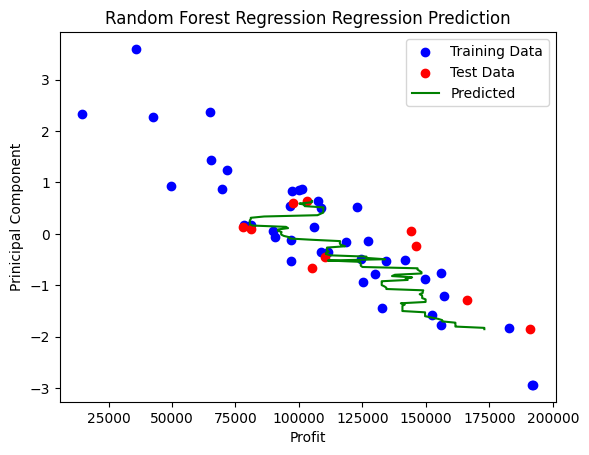

In [80]:
plt.scatter(y_train,x_train_new,color='b',label='Training Data')
plt.scatter(y_test,x_test_new,color='r',label='Test Data')
plt.plot(y_pred_d,np.linspace(min(x_test_new),max(x_test_new),100),color='g',label='Predicted')
plt.title('Random Forest Regression Regression Prediction')
plt.ylabel('Prinicipal Component')
plt.xlabel('Profit')
plt.legend()
plt.show()

#### 3D Plot

In [81]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train_new3=pca.fit_transform(x_train)
x_test_new3=pca.transform(x_test)
x_test_new3

array([[ 0.63990668, -0.2864744 ],
       [ 0.06207991,  1.59014215],
       [-0.24623875,  0.84326207],
       [ 0.13526029, -0.12470314],
       [-1.85674019,  1.87122077],
       [-0.66743284,  0.57409227],
       [ 0.08494488,  0.54344218],
       [ 0.59333201,  0.28305994],
       [-0.4581963 ,  0.22867484],
       [-1.29328681,  2.176305  ]])

In [82]:
regressor=RandomForestRegressor(random_state=0)
regressor.fit(x_train_new3,y_train)
y_pred=regressor.predict(x_test_new3)
score=r2_score(y_test,y_pred)
score

0.6133075622475658

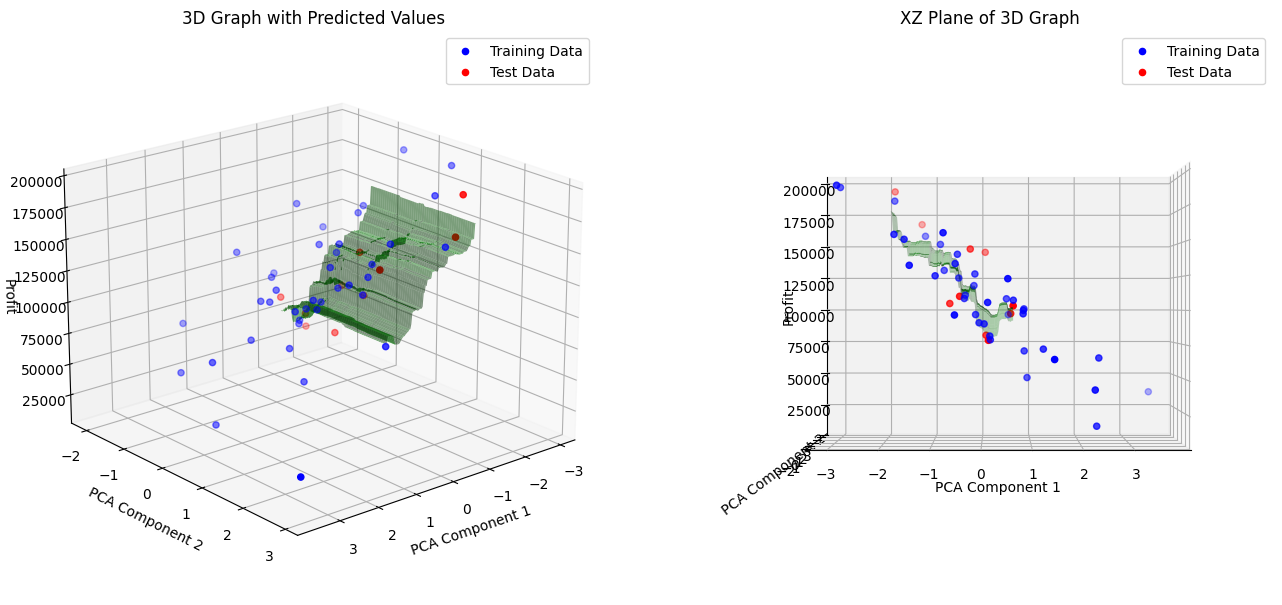

In [83]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_train_new3[:, 0], x_train_new3[:, 1], y_train, c='blue', label='Training Data')
ax1.scatter(x_test_new3[:, 0], x_test_new3[:, 1], y_test, c='red', label='Test Data')
x_plane = np.linspace(min(x_test_new3[:, 0]), max(x_test_new3[:, 0]), 100)
y_plane = np.linspace(min(x_test_new3[:, 1]), max(x_test_new3[:, 1]), 100)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = regressor.predict(np.c_[x_plane.reshape(-1), y_plane.reshape(-1)])
z_plane = z_plane.reshape(x_plane.shape)
ax1.plot_surface(x_plane, y_plane, z_plane,alpha=0.5,color='green')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('Profit')
ax1.set_title('3D Graph with Predicted Values')
ax1.view_init(elev=20, azim=50)
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x_train_new3[:, 0], x_train_new3[:, 1], y_train, c='blue', label='Training Data')
ax2.scatter(x_test_new3[:, 0], x_test_new3[:, 1], y_test, c='red', label='Test Data')
x_plane = np.linspace(min(x_test_new3[:, 0]), max(x_test_new3[:, 0]), 100)
y_plane = np.linspace(min(x_test_new3[:, 1]), max(x_test_new3[:, 1]), 100)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = regressor.predict(np.c_[x_plane.reshape(-1), y_plane.reshape(-1)])
z_plane = z_plane.reshape(x_plane.shape)
ax2.plot_surface(x_plane, y_plane, z_plane,alpha=0.3,color='green')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('Profit')
ax2.set_title('XZ Plane of 3D Graph')
ax2.legend()
ax2.view_init(elev=0, azim=-90)

plt.show()

Best Regrads,<br>
Lakshya Sharma